<a href="https://colab.research.google.com/github/avipreet21/cap-comp215/blob/main/completeProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT1**

### Name: Avipreet singh

### date: 2023-02-19
## **Plotting Potentially Hazardous Near Earth Objects**

NASA maintains a database for every known Near Earth Object, with data about its orbit and predictions about 
near approaches to other objects, like Earth, the Moon, or other planets. 

### MODULES
This first block of the code will contian all the modules.

In [1]:
import datetime, json, requests
from pprint import pprint 
from dataclasses import dataclass
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np

## CUSTOMIZE
The data can be customize according to your need

In [2]:
API = "0Av2q2Qlg82j2FQ9aiqcIGCOD5bpy1xidcEzcp7D" #One can enter their own api key in this.

potentially_hazardous_asteroid_you = True  
# set this to true or false. The true means the code will also compute the data of astroids which are potentially hazardous in specific dates.

start_date = str(datetime.date.today())  # date from which u want to fetch the data of hazardous astroids.

days = 2 # date till which u want fetch the data of hazardous astroids. Days is the difference between the first and last date.
# Conside that max value of days can be 7 not more.
end_date = str(datetime.date.today() - timedelta(days))

NEO_list = [] # list all the neo's id that u wanna compare with the hazardous astroids or with each other.

orbiting_body_you = 'Earth' # if one only want the data of the astroid with specific orbiting body.

# Finding the potentially hazardous asteroids

In [3]:
if potentially_hazardous_asteroid_you == True:
  url_dates = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API}'
  response_dates = requests.request("GET", url_dates, headers={}, data={})
  data_dates = json.loads(response_dates.text)
  neos_dates = data_dates['near_earth_objects']
  num = days
  for i in range(len(neos_dates)):
    start_point =  str(datetime.date.today() - timedelta(days = num))
    for i in range(len((neos_dates[start_point]))):
      if neos_dates[start_point][i]['is_potentially_hazardous_asteroid'] == True:
        NEO_list.append(neos_dates[start_point][i]['id'])
    num = num -1               

pprint(NEO_list)                  

['2069230', '3457840', '3773752']


## Class CloseApproach to calsify the data NEO's

In [4]:
@dataclass
class CloseApproach:

  ID : str
  orbiting_body : str
  approach_date : object
  miss_distance :float 
  relative_velocity: float
  @classmethod
  def From_neo(cls, ID):
    id = ID
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{ID}/?api_key={API}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    data_close = data['close_approach_data']
    new = []
    for i in range(len(data_close)):
      orbiting_body = data_close[i]['orbiting_body']
      approach_date =data_close[i]['close_approach_date']
      miss_distance = data_close[i]['miss_distance']['kilometers']
      relative_velocity = data_close[i]['relative_velocity']['kilometers_per_hour']
      new.append(CloseApproach(id ,orbiting_body,approach_date,miss_distance,relative_velocity))
    return new  

### FETCHING DATA

In this block, I fetch the data from the list made up of class objects of the neos whoes are id's were included in the NEO_list. The data we fetch is the missing distance and the dates as well.

In [5]:
y = []
x = []
for i in NEO_list: 
  data_structure = CloseApproach.From_neo(i)
  data_structure_specific_body = [data_structure[body] for body in range(len(data_structure)) 
  if data_structure[body].orbiting_body == orbiting_body_you]
  y.append([float(data_structure_specific_body[item].miss_distance)/1000000 
  for item in range(len(data_structure_specific_body))])
  x.append([datetime.datetime.strptime(data_structure_specific_body[item].approach_date, '%Y-%m-%d') 
  for item in range(len(data_structure_specific_body))])


## Creating the display

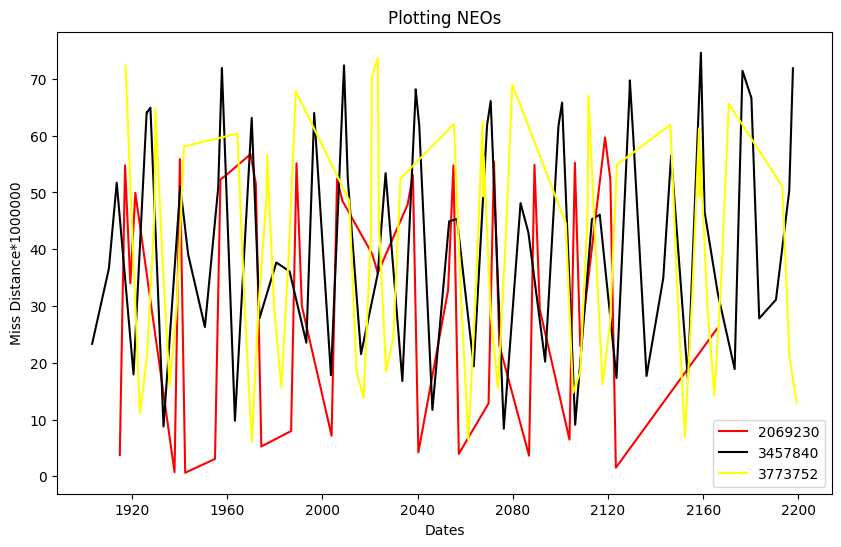

In [9]:

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

# Plotting  curves simultaneously

colors = ['red','black','yellow','green','blue','purple']
for (i,r) in zip(range(len(NEO_list[:7])),colors):
  plt.plot(x[i], y[i], color= r , label= NEO_list[i])

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Dates")
plt.ylabel("Miss Distance*1000000")
plt.title("Plotting NEOs")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()